In [ ]:
# The first step is to take a look at the dataset.
# We have the CSV file named 'creditcard.csv' in the same directory as our codebase.

# Pandas is a powerful library for data manipulation and analysis.
# It provides data structures and functions needed to work with structured data.

import pandas as pd # We import pandas & aliased it as pd for convenience


df = pd.read_csv('creditcard.csv') # Load the dataset using pandas

df.head() # Display the first five rows of the dataset

# Useful for confirming that the file loaded correctly and seeing the 
# feature columns (like Time, V1 to V28, Amount, and Class).

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.shape # This returns the dimensions of the DataFrame df — specifically, the number of rows and columns.

    # 284,807 → Number of transactions (rows).
    # 31 → Number of features (columns), including:
    # Time
    # V1 to V28
    # Amount
    # Class (target)

(284807, 31)

In [ ]:
df.info() # This gives you a concise summary of the DataFrame df, including:
                # The total number of entries (rows)
                # Column names
                # Non-null counts per column
                # Data types of each column
                # Memory usage

# Interpretation:
    # All features have no missing values (284807 non-null)
    # float64 means numerical (decimal) values
    # Class is the target (0 = legitimate, 1 = fraud)
    # V1–V28 are anonymized features extracted via PCA (Principal Component Analysis)
    # Time and Amount are raw features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df['Class'].value_counts() # Shows fraud and non-fraud transactions

# It counts the number of occurrences of each class label (fraud vs non-fraud) in the dataset.

# Interpretation:
    # 284,315 transactions are legitimate (Class = 0)
    # 492 transactions are fraudulent (Class = 1)

Class
0    284315
1       492
Name: count, dtype: int64

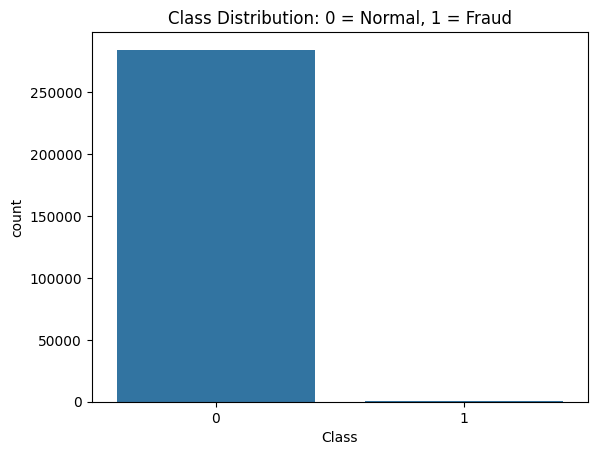

In [ ]:
# This code block is used to visualize the class distribution (legit vs fraud transactions) in the dataset.
# It helps us understand the class imbalance, which is crucial for fraud detection tasks.

# Imports Seaborn and Matplotlib, libraries used for plotting and data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# sns visualizes the (imbalance) class distribution
    # by creating a bar chart showing how many records exist for each class label:
    # 0 = Normal (non-fraud)
    # 1 = Fraud
sns.countplot(x='Class', data=df) 
plt.title('Class Distribution: 0 = Normal, 1 = Fraud')
plt.show()

# Why This Is Important:
    # Machine learning models trained on imbalanced data like this may:
    # - Become biased toward the majority class (normal transactions),
    # - Fail to detect fraud correctly.
    # This insight will guide how we:
    # - Preprocess the data (e.g., under/oversampling),
    # - Evaluate models (using precision, recall, F1—not just accuracy),
    # - Choose algorithms robust to imbalance.

In [ ]:
df.describe() # displays descriptive statistics for all numerical columns in the DataFrame df

# This includes:
    # count: Number of non-null entries
    # mean: Average value
    # std: Standard deviation (measure of spread)
    # min: Minimum value
    # 25%: 1st quartile (25th percentile)
    # 50%: Median (50th percentile)
    # 75%: 3rd quartile (75th percentile)
    # max: Maximum value
# Interpretation:
    # Time: Ranges from 0 to 172792 seconds (about 2 days and 1 hour)
    # V1 to V28: Range from -56.407 to 2.454
    # Amount: Ranges from 0.0 to 25691.16 (most transactions are small)
    # Class: 0 (normal) or 1 (fraud)        
# This summary helps us understand the data's distribution, detect outliers, and identify potential preprocessing needs. 
# For example, if the Amount feature has extreme values, we might consider scaling, normalization, or balancing it.
    


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
# Data Preprocessing
# This block of code performs feature scaling on the Amount and Time columns using 
# standardization (also known as Z-score normalization). 
    # Here's what each part does in detail:
        
# First, we Normalize the 'Amount' & 'Time' columns

from sklearn.preprocessing import StandardScaler
# Imports StandardScaler, a class from scikit-learn used to scale features by removing the mean and scaling to unit variance.


scaler = StandardScaler() # StandardScaler transforms data to have mean = 0 and std = 1
# Creates an instance of StandardScaler. This scaler will learn the mean and standard deviation of the column(s) you pass to it.

# Create new columns for scaled features by fitting
# the scaler to the 'Amount' and 'Time' columns
# fit_transform(df[['Amount']]) does two things:
    # fit() computes the mean and std of the Amount column.
    # transform() then scales each value in Amount using:
                # 𝑧 = 𝑥 − mean / std
# where:
    # 𝑧 is the scaled value,
    # 𝑥 is the original value,
    # mean is the mean of the Amount column,
    # std is the standard deviation of the Amount column.
# This ensures that the scaled values have a mean of 0 and a standard deviation of 1.
# The same process is applied to the 'Time' column.
# The result is two new columns in the DataFrame:
# - scaled_amount: The standardized version of the Amount column.
# - scaled_time: The standardized version of the Time column.
# These new columns can be used in machine learning models, as they are now on a similar scale, which helps improve model performance and convergence during training.
# Note: The fit_transform method is used here to both fit the scaler to the data and
# transform the data in one step. If you wanted to scale multiple columns, you could pass
# a list of column names to fit_transform, like this:
# scaler.fit_transform(df[['Amount', 'Time']]) 
df['scaled_amount'] = scaler.fit_transform(df[['Amount']])
df['scaled_time'] = scaler.fit_transform(df[['Time']])

# To check the ouput which now includes new columns
df[['Amount', 'scaled_amount', 'Time', 'scaled_time']].head()

# Why This Matters:
    # CNN and traditional ML models like Logistic Regression and Random Forest perform better when input 
    # features are normalized, especially when feature values vary greatly in scale.

,Amount,scaled_amount,Time,scaled_time
0,149.62,0.244964,0.0,-1.996583
1,2.69,-0.342475,0.0,-1.996583
2,378.66,1.160686,1.0,-1.996562
3,123.50,0.140534,1.0,-1.996562
4,69.99,-0.073403,2.0,-1.996541


In [ ]:
df.drop(['Time', 'Amount'], axis=1, inplace=True)
# df.drop() is used to remove specified columns or rows from the DataFrame.
# Here, we are dropping the 'Time' and 'Amount' columns from df.
# axis=1 indicates that we are dropping columns (axis=0 would mean dropping rows).
# inplace=True means that the changes will be applied directly to df, modifying it in place.
# After this operation, df will no longer contain the original 'Time' and 'Amount'
# columns, only the scaled versions ('scaled_time' and 'scaled_amount') will remain.
# This is important because we want to use the scaled (normalized) features in our machine learning models,
# and the original features may not be needed anymore.
# Now, we can check the DataFrame again to confirm the changes
# df.head() # Displays the first five rows of the DataFrame df after dropping the 'Time' and 'Amount' columns.

In [ ]:
scaled_features = ['scaled_time'] + [f'V{i}' for i in range(1, 29)] + ['scaled_amount']
# It creates a list of the names of all the input features you’ll use to train your model.

# This list includes:
# - 'scaled_time': The standardized version of the Time feature.
# - 'V1' to 'V28': The anonymized features extracted via PCA.
# - 'scaled_amount': The standardized version of the Amount feature.
# This list will be used to select the relevant columns from the DataFrame for training the model
# and for making predictions later on.

In [ ]:
X = df[scaled_features]  # Features for training
y = df['Class']  # Target variable

# Here, we are splitting the dataset into:
    # X → all the input features (independent variables)
    # y → the target variable (Class), which indicates whether a transaction is fraudulent (1) or normal (0)

# This is a crucial step in preparing the data for machine learning, as it separates the features from the target variable. 
# X will be used to train the model, while y will be used to evaluate its performance.
# Now, we can check the shapes of X and y to confirm they are correctly set up
# print(f"Shape of X: {X.shape}")  # Should be (284807, 30) since we have 30 features
# print(f"Shape of y: {y.shape}")  # Should be (284807,) since y is a single column (target variable)

In [ ]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# train_test_split() is a function from scikit-learn that splits the dataset into training and testing sets.
# Here’s what each parameter does:
    # X: The input features (independent variables).
    # y: The target variable (dependent variable).
    # test_size=0.2: This specifies that 20% of the data will be used for testing, while 80% will be used for training.
    # stratify=y: This ensures that the class distribution in the target variable y is preserved in both the training and testing
    # sets. This is important for imbalanced datasets like fraud detection, where we want to maintain the ratio of normal to fraudulent transactions in both sets.
    # random_state=42: This sets a random seed for reproducibility. It ensures that the split will be the same every time you run the code, which is useful for debugging and consistency in results.
# After this operation, we will have:
    # X_train: Training features (80% of the data)
    # X_test: Testing features (20% of the data)
    # y_train: Training target variable (80% of the data)
    # y_test: Testing target variable (20% of the data) 

In [ ]:
# Reshape the Data for CNN b/c CNN expects 3D input of shape 
# (samples, features, channels)

import numpy as np

X_train = np.array(X_train).reshape(-1, 30, 1)
X_test = np.array(X_test).reshape(-1, 30, 1)

# np.array(X_train) converts the DataFrame X_train into a NumPy array, which is required by
# most deep learning models, epecially in TensorFlow/Keras.
# .reshape(-1, 30, 1) reshapes the array into a 3D shape:
    # - The first dimension (-1) is inferred automatically based on the number of samples.
    # - The second dimension (30) corresponds to the number of features (we're using 30 total: 28 PCA features + 2 scaled features).
    # - The third dimension (1) represents the number of channels (in this case, we have only one channel (like a grayscale image — this is needed to mimic CNN input format)).

In [ ]:
# Build and Train the CNN Model for Fraud Detection

# We build a 1D Convolutional Neural Network (CNN) that learns to 
# detect fraud based on the 30 numerical features per transaction

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

# Sequential: Builds the model step by step (layer by layer).
# Conv1D: 1D convolution layer to extract local patterns - useful for detecting patterns in time series or structured data.
# MaxPooling1D: Reduces the spatial dimension of the output (helps generalization)
# Flatten: Flattens 3D output to 1D.
# Dense: Fully connected layer (like in traditional NN).
# Dropout: Randomly disables neurons to prevent overfitting.
# BatchNormalization: Normalizes the activations to speed up training and add regularization.
# EarlyStopping: Stops training when model (validation loss) stops improving.

model = Sequential() # The spaptial API stacks layers in a single straight line, allowing you to build a model layer by layer.

# First Convolutional Block
model.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=(30, 1)))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
# Explanation of the first convolutional block:
    # Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=(30, 1)):
    # - filters=32: This means the layer will learn 32 different feature detectors (filters) that will slide over the input data.
    # - kernel_size=2: The filter will look at 2 consecutive values at a time (like a sliding window).
    # - activation='relu': The ReLU (Rectified Linear Unit) activation function introduces non-linearity, allowing the model to learn complex patterns.
    # - input_shape=(30, 1): This specifies the shape of the input data, which has 30 features and 1 channel (like a grayscale image).
# BatchNormalization() normalizes the output of the previous layer, which helps speed up training and improve performance.
# MaxPooling1D(pool_size=2) reduces the dimensionality of the output by taking the maximum value in each 2-value segment, which helps to retain important features while reducing noise and computational complexity.


# Second Convolutional Block
model.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
# Explanation of the second convolutional block:
    # Conv1D(filters=64, kernel_size=2, activation='relu'):
    # - filters=64: This layer will learn 64 different feature detectors, allowing it to capture more complex patterns.
    # - kernel_size=2: Again, the filter looks at 2 consecutive values at a time.
    # - activation='relu': The ReLU activation function is applied to introduce non-linearity.
# BatchNormalization() normalizes the output of the previous layer.
# MaxPooling1D(pool_size=2) again reduces the dimensionality of the output by taking the maximum value in each 2-value segment, which helps to retain important features while reducing noise and computational complexity.

# Flatten and Dense Layers
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))  # Dropout layer to reduce overfitting
# Explanation of the flattening and dense layers:
    # Flatten() converts the 3D output from the previous layer into a 1D array, which is necessary for the fully connected (Dense) layers.
    # Dense(64, activation='relu') adds a fully connected layer with 64 neurons, using the ReLU activation function to introduce non-linearity.
    # Dropout(0.5) randomly sets 50% of the neurons in this layer to zero during training, which helps prevent overfitting by reducing reliance on specific neurons.

# Output layer
model.add(Dense(1, activation='sigmoid'))
# Explanation of the output layer:
    # Dense(1, activation='sigmoid') adds a single neuron to the output layer, which is used for binary classification (fraud vs. non-fraud).
    # The sigmoid activation function outputs a value between 0 and 1, representing the probability of the transaction being fraudulent (1) or normal (0).




In [ ]:
# Compile the CNN model and prepares it for training
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Explanation:
# Adam optimizer — fast, efficient, and adapts learning rate during training.
# loss='binary_crossentropy' → Appropriate for binary classification problems. Measures the difference between predicted and actual class probabilities.
# metrics=['accuracy'] → tracks training performance (Tells Keras to display accuracy during training and evaluation)

In [ ]:
# Train the Model
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
# Explanation: 
    # monitor='val_loss' -  Monitors the validation loss to decide when to stop training.
    # patience=3 - If val_loss doesn’t improve for 3 consecutive epochs, training stops early.
    # restore_best_weights=Tru - After stopping, it restores the model weights from the epoch with the lowest validation loss. Helps avoid overfitting.


history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=2048,
    validation_split=0.2,  # 20% of training data for validation
    callbacks=[early_stop],
    verbose=1
)

# Explanation:
    # X_train, y_train -> The training data
    # epochs=20 -> Maximum number of training cycles (could stop earlier due to early stopping).
    # batch_size=2048 -> Number of samples processed before the model updates weights. Larger batch sizes speed up training but may require more memory.
    # validation_split=0.2 -> Uses 20% of the training data for validation (i.e., model performance evaluation after each epoch).
    # callbacks=[early_stop] -> Uses the early stopping rule defined above.
    # werbose=1 -> Shows training output per epoch in the notebook.

# What Happens During Training:
    # For each epoch, you'll see:
    # loss: training loss
    # accuracy: training accuracy
    # val_loss: validation loss
    # val_accuracy: validation accuracy
    # This allows you to track how well the model is learning and generalizing to unseen data.




Epoch 1/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 13s 87ms/step - accuracy: 0.9352 - loss: 0.1698 - val_accuracy: 0.5806 - val_loss: 0.6504
Epoch 2/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 8s 84ms/step - accuracy: 0.9991 - loss: 0.0072 - val_accuracy: 0.8650 - val_loss: 0.4260
Epoch 3/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 7s 82ms/step - accuracy: 0.9993 - loss: 0.0054 - val_accuracy: 0.9986 - val_loss: 0.0756
Epoch 4/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 8s 88ms/step - accuracy: 0.9994 - loss: 0.0045 - val_accuracy: 0.9993 - val_loss: 0.0089
Epoch 5/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 8s 85ms/step - accuracy: 0.9993 - loss: 0.0036 - val_accuracy: 0.9993 - val_loss: 0.0038
Epoch 6/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 8s 84ms/step - accuracy: 0.9993 - loss: 0.0037 - val_accuracy: 0.9994 - val_loss: 0.0035
Epoch 7/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 8s 83ms/step - accuracy: 0.9994 - loss: 0.0035 - val_accuracy: 0.9993 - val_loss: 0.0035
Epoch 8/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 8s 89ms/step - accuracy: 0.9994 - loss: 0.0034 - val_accuracy: 0.9994 - 

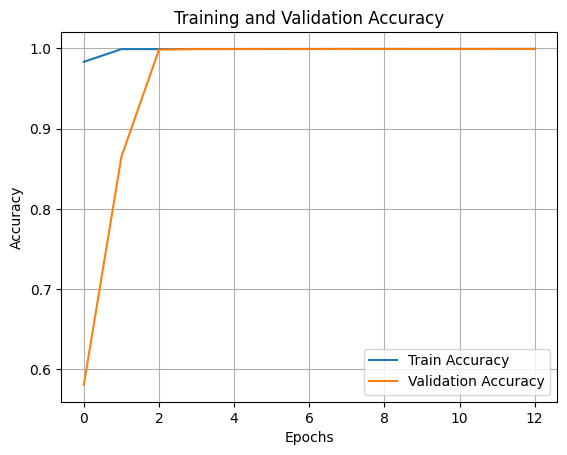

In [26]:
# Plot Training History (Optional but Helpful)

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Here, We Make Predictions on Test Data

# Predict probabilities
y_pred_prob = model.predict(X_test)

# Convert probabilities to class predictions (0 or 1)
y_pred = (y_pred_prob > 0.5).astype(int)

# Explanation:
# CNN outputs probabilities (sigmoid).
# We convert any prediction > 0.5 to 1 (fraud), else 0.

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step


In [ ]:
# Evaluate Model Performance

# We’ll evaluate using:
    # Accuracy
    # Confusion Matrix
    # Precision, Recall, F1-Score
    # ROC Curve and AUC

#These help us understand how well the model detects fraudulent 
# transactions, especially in an imbalanced dataset.

# Accuracy and Confusion Matrix

from sklearn.metrics import accuracy_score, confusion_matrix

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
# Accuracy = (Correct Predictions) / (Total Predictions)
# In imbalanced datasets like fraud detection, accuracy can be misleading, because predicting all "normal" transactions gives very high accuracy but misses actual frauds.

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cm)

# Explanation of the confusion matrix:
# [[TN  FP]
# [FN  TP]]

# The confusion matrix shows:
    # True Positives (TP): Fraud predicted as fraud
    # True Negatives (TN): Normal predicted as normal
    # False Positives (FP): Normal predicted as fraud (Type I error)
    # False Negatives (FN): Fraud predicted as normal (Type II error)

Accuracy: 0.9994
Confusion Matrix:
 [[56857     7]
 [   30    68]]


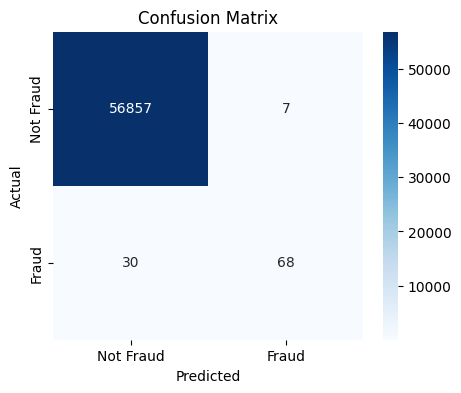

In [29]:
# Visualize Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Fraud", "Fraud"], yticklabels=["Not Fraud", "Fraud"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# What to Look For:
    # True Positives (fraud correctly detected)
    # False Positives (non-fraud flagged as fraud)
    # True Negatives (non-fraud correctly identified)
    # False Negatives (fraud missed by the model — very important!)



In [ ]:
# Precision, Recall, F1-Score
# These functions evaluate CNN’s performance specifically on the fraudulent class (1).

from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
# Measure the model's performance:
    # precision_score() calculates the proportion of true positive predictions among all positive predictions (TP / (TP + FP)). 
    # recall_score() calculates the proportion of true positive predictions among all actual positives (TP / (TP + FN)).
    # f1_score() is the harmonic mean of precision and recall, providing a balance between the two (2 * (precision * recall) / (precision + recall)).
# What These Mean:
    # Metric	   |Meaning
    # Precision	   |Of all transactions predicted as fraud, how many were actually fraud?
    # Recall	   |Of all actual frauds, how many did we catch?
    # F1 Score	   |Balance between precision and recall


print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Why These Metrics Matter:
    # Precision is important to minimize false positives (normal transactions flagged as fraud).
        # High precision means fewer legitimate transactions are incorrectly flagged as fraud, reducing customer inconvenience and operational costs.
    # Recall is crucial to minimize false negatives (fraudulent transactions missed by the model).
        # High recall means we catch most fraudulent transactions, which is essential for fraud detection.
    # F1 Score balances precision and recall, providing a single metric to evaluate model performance.
    # In fraud detection, we often prioritize recall over precision because:
        # Missing a fraudulent transaction (false negative) can lead to significant financial losses.
        # However, we also want to keep precision high to avoid inconveniencing customers with false fraud alerts.

# Precision: 0.9067
# Recall:    0.6939
# F1 Score:  0.7861
# This means:
    # The model correctly flags 90.67% of predicted frauds.
    # It detects 69.39% of all actual frauds (some are missed).
    # The overall balance between detecting fraud and avoiding false alarms is moderately good (F1 = 78.61%).

Precision: 0.9067
Recall: 0.6939
F1 Score: 0.7861


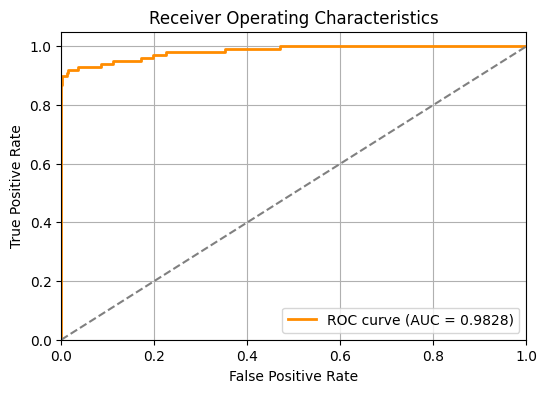

In [31]:
# ROC Curve & AUC (Area Under Curve)

from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

#Plot ROC
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Interpretation:
    # AUC = 1.0 → perfect
    # AUC = 0.5 → no better than random
    # Typically, >0.9 is excellent for this dataset

In [34]:
# Now. let's compare the performance of our CNN model with RF & XGBoost models
# to see how well our CNN performs against traditional machine learning models.
# We will evaluate their performance using the same metrics: 
# accuracy, confusion matrix, precision, recall, F1-score, and ROC-AUC and the same preprocessed data.

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, roc_curve, auc

# We will be reshaping the data back to 2D 
# to train these traditional models because unlike CNN,
# they do not require reshaping to 3D.
X_train_2d = X_train.reshape(X_train.shape[0], -1)
X_test_2d = X_test.reshape(X_test.shape[0], -1)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
rf_model.fit(X_train_2d, y_train)

# Predictions
rf_preds = rf_model.predict(X_test_2d)
rf_probs = rf_model.predict_proba(X_test_2d)[:, 1]

print("Random Forest:")
print(classification_report(y_test, rf_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_preds))
print("AUC", roc_auc_score(y_test, rf_probs))

Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.82      0.87        98

    accuracy                           1.00     56962
   macro avg       0.97      0.91      0.94     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:
 [[56859     5]
 [   18    80]]
AUC 0.9630272515590367


In [35]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Fit the model
xgb_model.fit(X_train_2d, y_train)

# Predictions
xgb_preds = xgb_model.predict(X_test_2d)
xgb_probs = xgb_model.predict_proba(X_test_2d)[:, 1]

print("XGBoost:")
print(classification_report(y_test, xgb_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, xgb_preds))
print("AUC", roc_auc_score(y_test, xgb_probs))


/home/bona/Desktop/works/cnn_project/cnn_env/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [06:35:45] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.87      0.80      0.83        98

    accuracy                           1.00     56962
   macro avg       0.93      0.90      0.91     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:
 [[56852    12]
 [   20    78]]
AUC 0.9389517272862999


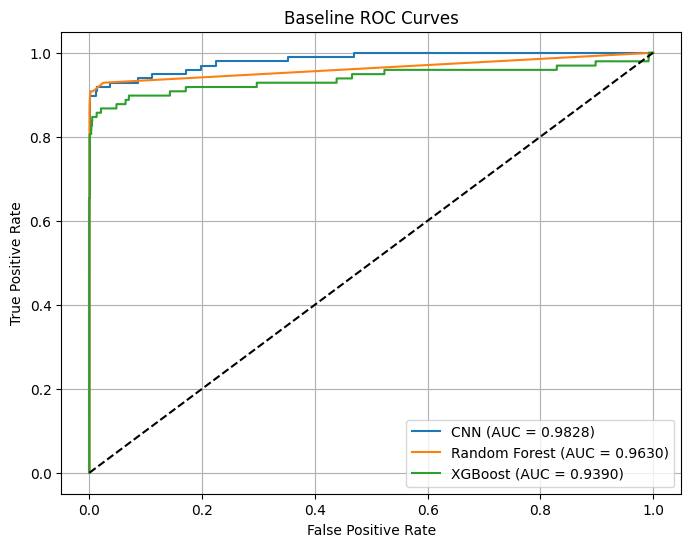

In [39]:
# Plot ROC Curves Together
import matplotlib.pyplot as plt

fpr_cnn, tpr_cnn, _ = roc_curve(y_test, y_pred_prob)
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_probs)

#Plot ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_cnn, tpr_cnn, label='CNN (AUC = %0.4f)' % roc_auc_score(y_test, y_pred_prob))
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = %0.4f)' % roc_auc_score(y_test, rf_probs))
plt.plot(fpr_xgb, tpr_xgb, label='XGBoost (AUC = %0.4f)' % roc_auc_score(y_test, xgb_probs))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Baseline ROC Curves')
plt.legend(loc='lower right')
plt.grid()
plt.show()
